# **Détermination de la taille d'un pixel d'un téléphone portable**
On veut déterminer la taille d’un pixel du capteur utilisée
par votre téléphone (matrice CMOS). C’est l’endroit où
est formée l’image par la partie optique et où elle est
numérisée c’est à dire, ”découpée” en grains appelés pixels.
Généralement, la taille d’un pixel est de l’ordre du μm.

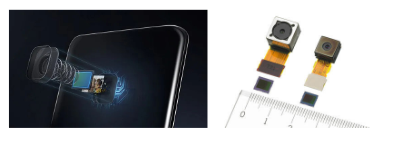



## **Expérience**

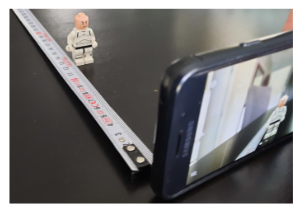

1/ Prendre différentes photos pour plusieurs distances D
entre le téléphone portable et l’objet (ne pas oublier de
faire la mise au point sans changer le zoom).

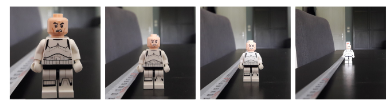

2/ 

a) Transférer les photos prises avec le téléphone sur
l’ordinateur

b) Mesurer en pixel la taille de l’objet pour différentes
valeurs D à l’aide d’un logiciel de retouche photos (Gimp ou ImageJ par exemple)

**Logiciel 1 Gimp** :
”Outils → Mesures” ou raccourci MAJ+M. La mesure en
pixel s’affiche en bas de la fenêtre.

**ou Logiciel 2 ImageJ :**
Icone ”droite” = *straight* sous la barre de menu puis
Ctrl+M pour l’outil mesure. La mesure en pixel s’affiche
dans le tableau d’une autre fenêtre.

## **Exploitation des données**

Pour une focale *f′* petite devant les distances de l’objet on
a l’expression approchée du grandissement

$\gamma = \frac{\overline{A'B'}}{\overline{AB}} \simeq \frac{f'}{D} $

où D est la distance de l'objet à la lentille.

On mesure la taille de l’image en pixel. 

Avec un logiciel de retouche d’image, on note $l_{pixel}$ sa taille mesurée en pixel sur l’image et $t_{pixel}$ la taille d’un pixel, on a alors 

$ {\overline{A'B'}} = l_{pixel}*t_{pixel} $


ce qui donne deux expression de $ {\overline{A'B'}} $ que l’on peut
identifier

$ l_{pixel}*t_{pixel} = \frac{f'}{D} {\overline{AB}} $

$ l_{pixel} = \frac{f'*{\overline{AB}}}{t_{pixel}}*\frac{1}{D} $

**Remarque 1:**

Pour connaître la focale de votre téléphone, faire un clic
droit sur la photo transférée sur l’ordinateur et choisir
l’onglet image.
On peut également regarder les détails (données Exif)
de la photo sur le téléphone (Android) ou utiliser une
application comme Exif Manager

**Remarque 2:** 

pour une incertitude sur x de ∆x (x ±∆x),
on a une incertitude sur $\frac{1}{x}$ de 

$ Δ(\frac{1}{x}) =  \frac{Δx}{x^2} $


## **Rendu du TP**


1/ Insérer des images de son expérience

2/ Donner l'expression du coefficient directeur de la fonction $ t_{pixel} = f(l_{pixel}) $


3/ En traçant $l_{pixel}$ en fonction de la l’inverse de la distance
$\frac{1}{D}$ avec le code python ci-dessous, on peut obtenir la taille
d’un pixel d’un téléphone à l’aide du coefficient directeur
du graphique.

Dans le programme Python, remplacer les coordonnées (x,y) et les incertitudes (ux,uy) par vos mesures et calculs.

Puis lancer l'exécution pour afficher votre diagramme.

In [ ]:
# -*- coding: utf-8 -*-

"""
Regression avec une fonction en utilisant la methode du xi2 reduit
Prise en compte des incertitudes en X et en Y
"""

from scipy import *
from pylab import *
import scipy.optimize as spo

# Donnees a modifier par l'etudiant
# Abscisses et ordonnees
X = array([0.221, 0.325, 0.462, 0.562, 0.656, 0.810, 0.922, 0.980])
Y = array([2.172, 3.151, 4.542, 5.526, 6.434, 7.974, 9.001, 9.632])
# Incertitudes sur les abscisses et les ordonnees
uX = array([0.011, 0.016, 0.023, 0.028, 0.038, 0.041, 0.046,	0.047])
uY = array([0.107, 0.155, 0.421, 0.275, 0.321, 0.400, 0.450,	0.480])

##Regression
def modele(x,a): #modele lineaire
    return a*x

def derivee(x,a): #derivee du modele
    return a

# fonction d'ecart entre mesure et modele ponderee par les incertitudes expe.
def residual(a, x, y, ux, uy) :
    return (y-modele(x, a))/sqrt(uy**2+(derivee(x,a)*ux)**2)

#estimation des parametres à optimiser
p0=array([1]) 

results = spo.leastsq(residual, p0, args=(X,Y,uX,uY), full_output=True) 

a = results[0] #Parametres d'ajustement optimaux 
yth = modele(X, a) # donnees ajustees
chi2_red = sum(square( residual(a, X, Y, uX, uY)))/(X.size - 1) # evaluation du xi2 reduit                                      

# Matrice de variance covariance estimee
covm = results[1]   
# Erreur sur les parametres estimes
erra = sqrt(diag(covm))

#Graphique
fig, ax = plt.subplots(1)
ax.errorbar(X,Y,xerr=uX, yerr=uY,fmt='o',label="data")

ax.plot(X,yth,label="fit")
textstr = "$y = a \cdot x$ \n\
$a = %.3e \pm %.3e $\n\
$\chi_{2,red} = %.2e$"  %(a,erra,chi2_red)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')

title(r'Titre du graphique',fontsize=16)

xticks(fontsize=12)
#ylim(0, 90)
xlabel(r'$x \mathrm{\; (Unit. \, x)}$', fontsize=16)   
yticks(fontsize=12)
ylabel(r'$y \mathrm{\; (Unit. \, y)}$', fontsize=16)
#ylim(0, 90)

ax.legend(loc=4)
show()